In [3]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
from numpy.random import *
from scipy import ceil, complex64, float64, hamming, zeros
from matplotlib import pylab as plt
%matplotlib inline
from cmf.group_boxplot import group_boxplot, make_legend

In [4]:
result_list = []
result_list.append(np.load('../dat/structure_detection/structure_result_3_2_201705131527.npz'))
result_list.append(np.load('../dat/structure_detection/structure_result_3_4_201705131528.npz'))
result_list.append(np.load('../dat/structure_detection/structure_result_3_6_201705131528.npz'))


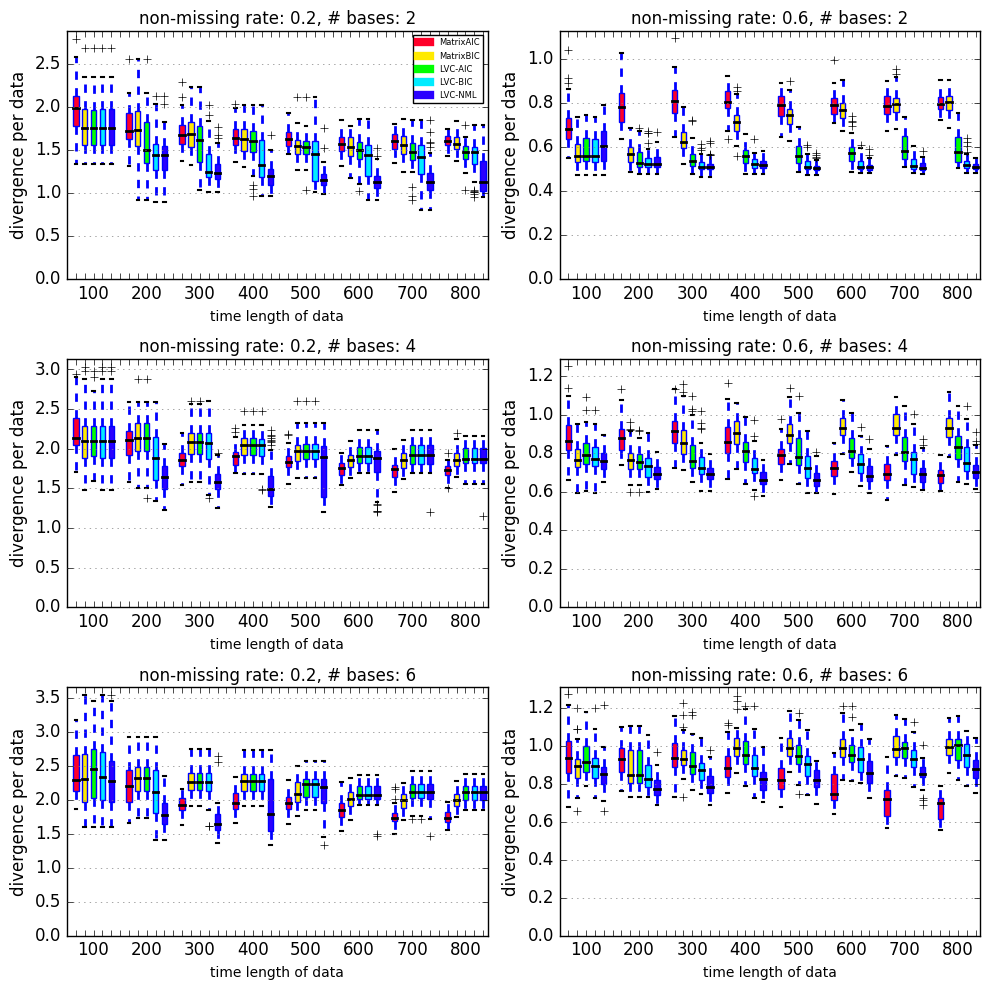

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
for i_result in range(len(result_list)):
    result = result_list[i_result]
    missing_rate_list = result['missing_rate_list']
    for i_missing_rate in range(len(missing_rate_list)):
        missing_rate = missing_rate_list[i_missing_rate]
        group_boxplot(ax[i_result][i_missing_rate], result['completion_error'][0][i_missing_rate],
                      y_min = 0.0,
                      xlabel = 'time length of data', 
                      ylabel = 'divergence per data',
                      group_name = result['n_samples_list'],
                      title = 'non-missing rate: ' + str(missing_rate) + ', # bases: ' + str(result['true_n_components_list'][0]))
method_list = ['MatrixAIC', 'MatrixBIC', 'LVC-AIC', 'LVC-BIC', 'LVC-NML']
make_legend(ax[0][0], method_list)
fig.tight_layout()
fig.savefig('../dat/structure_detection/completion_3_201705131528.png')

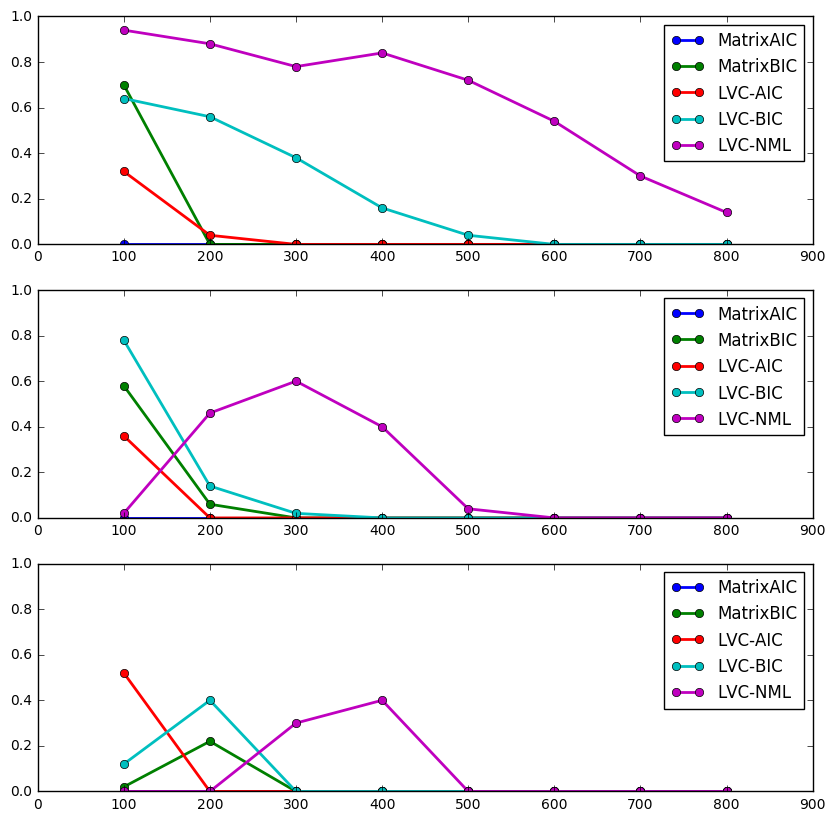

In [10]:
fig, ax = plt.subplots(nrows=3, figsize=(10,10))
for i_result in range(len(result_list)):
    result = result_list[i_result]
    accuracy = result['accuracy']
    n_samples_list = result['n_samples_list']
    for i_method in range(len(method_list)):
        ax[i_result].plot(n_samples_list, accuracy[0, :, i_method], '-o', linewidth=2, label=method_list[i_method], markersize=6)
        ax[i_result].set_xlim([0, 900])
        ax[i_result].set_ylim([0, 1])
        ax[i_result].legend()
fig.savefig('../dat/structure_detection/accuracy_3_201705131528.png')